In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
plt.rcParams['figure.figsize'] = (20.0, 18.0)

In [ ]:
excel_file='../data/test1.xlsx'
df = pd.read_excel(excel_file, 'Sheet1', index_col=None, na_values=['NA'])
df['建筑面积分类']=df['wlc_建筑面积']//200000
df['sunhours_avg']=df['sunhours']/df['wlc_建筑表面积']
df['radiation_avg']=df['radiation']/df['wlc_建筑表面积']

# 可视化数据分布
任何分析或建模数据工作的早期步骤都应该是了解变量的分布方式。分布可视化技术可以为许多重要问题提供快速答案。
观测涵盖什么范围？
他们的核心倾向是什么？
它们是否严重偏向一个方向？
是否有双峰性的证据？
是否存在明显的异常值？
这些问题的答案是否因其他变量定义的子集而异？

## 单变量直方图

In [ ]:
# 单变量直方图binwidth可以设置柱宽，bin可以设置柱子数量
sns.displot(df, x="sunhours_avg", bins=20)

In [ ]:
sns.displot(df, x="sunhours_avg", hue="建筑面积分类", element="step", bins=20)

In [ ]:
sns.displot(df, x="sunhours_avg", hue="建筑面积分类", multiple="stack")

In [ ]:
sns.displot(df, x="sunhours_avg", hue="建筑面积分类", stat="probability")

## 核密度估计

In [ ]:
sns.displot(df, x="sunhours_avg", kind="kde")

In [ ]:
sns.displot(df, x="sunhours_avg", kind="kde", bw_adjust=.25)

In [ ]:
sns.displot(df, x="sunhours_avg",hue="建筑面积分类", kind="kde", fill=True)

## 经验累积分布
可视化分布的第三个选项计算"经验累积分布函数"（ECDF）。此图通过每个数据点绘制一条单调递增的曲线，以便曲线的高度反映具有较小值的观测值的比例：

In [ ]:
sns.displot(df, x="sunhours_avg",hue="建筑面积分类", kind="ecdf")

## 可视化二元分布

In [ ]:
sns.displot(df, x="sunhours_avg",y="radiation_avg")

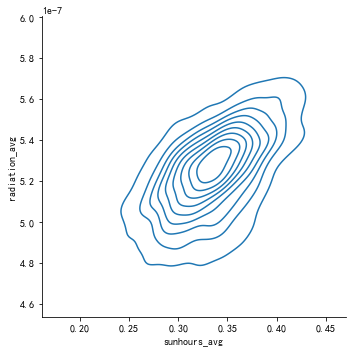

In [21]:
sns.displot(df, x="sunhours_avg",y="radiation_avg", kind="kde")

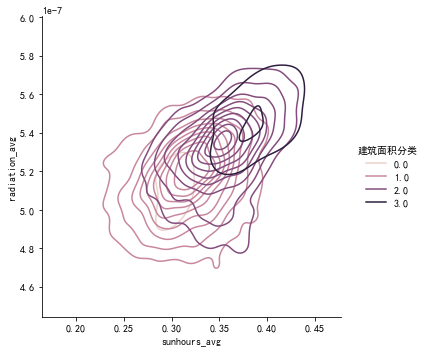

In [22]:
sns.displot(df, x="sunhours_avg",y="radiation_avg",hue="建筑面积分类", kind="kde")

## 绘制联合分布和边际分布

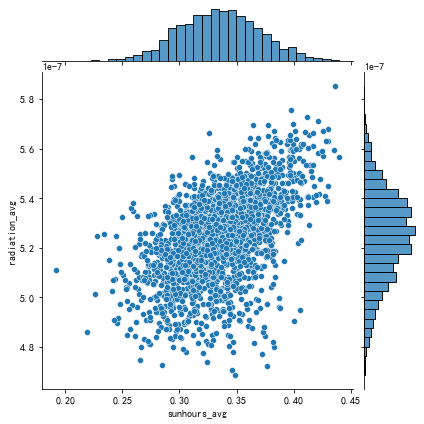

In [23]:
sns.jointplot(data=df, x="sunhours_avg", y="radiation_avg")


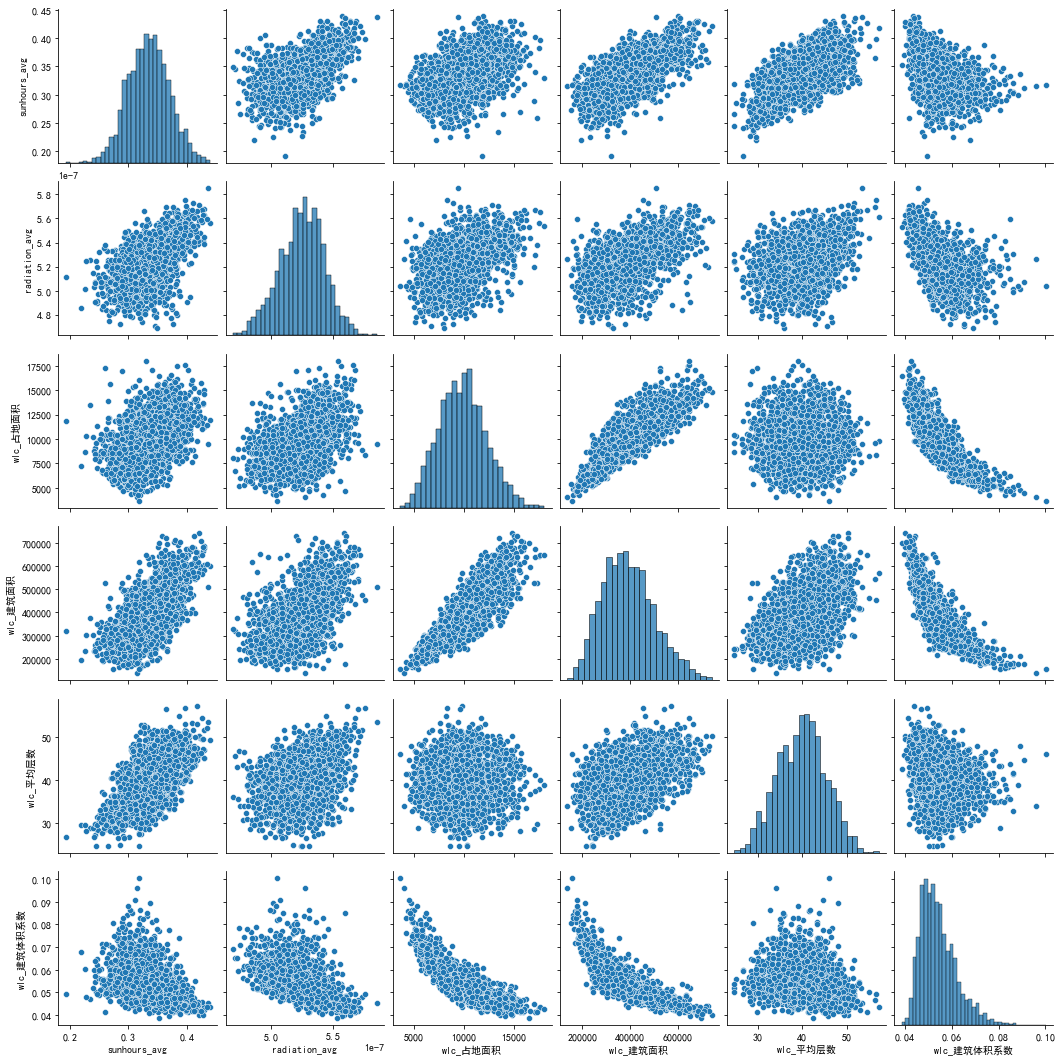

In [26]:
df_ana=df.loc[:,["sunhours_avg","radiation_avg","wlc_占地面积","wlc_建筑面积","wlc_平均层数","wlc_建筑体积系数"]]
sns.pairplot(df_ana)

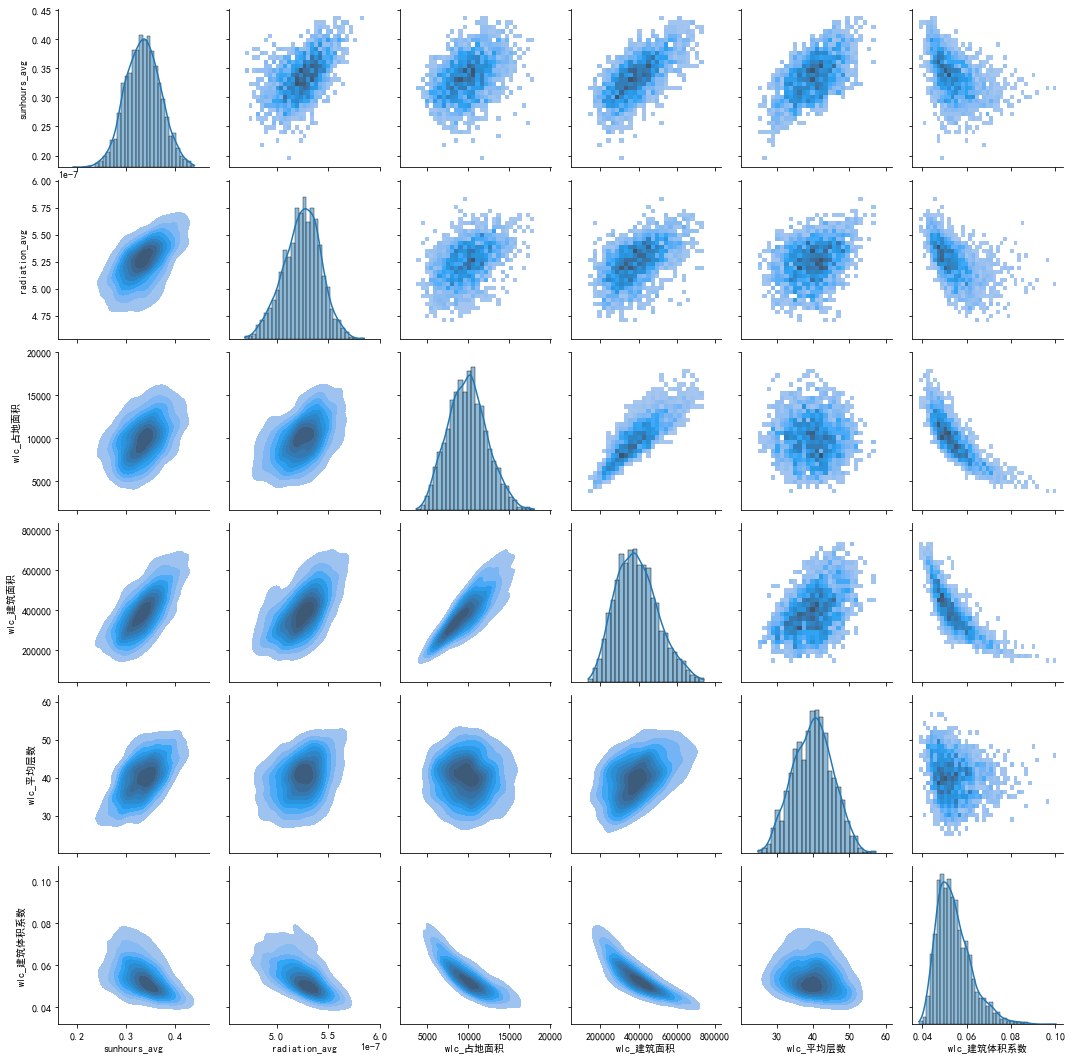

In [27]:
g = sns.PairGrid(df_ana)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)